# Modelo Exponencial

Creation on October 17 2021.

@author: Rogerio Chaves

E-mail: chaves.rogerio@outlook.com

github: https://github.com/Rogerio-Chaves/Estatistica/tree/main/Probabilidade/Variaveis_Aleatorias_Continuas

O modelo exponencial tem aplicações em confiabilidade de sistemas.

Importar bibliotecas.

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import matplotlib.style as style

Definição do estilo que será utilizado nos _plots_.

In [2]:
style.use('seaborn')

Definição da função exponencial.

A função exponencial é dada por,

$
f(t, \beta) = \frac{1}{\beta} \cdot {e^{-\frac{t}{\beta}}},\ se\ t \geq 0;\\
f(t, \beta) = 0\ se\ t < 0.
$

In [3]:
def exponential_function(t, beta):
    if t >= 0:
        numerator = np.exp(-t / beta)
        return numerator / beta
    else:
        return 0

Definição da função acumulada exponencial. 

Dado por,

$
\int_{t}^{\infty}\frac{1}{\beta} \cdot {e^{-\frac{t}{\beta}}}d(t)
$

In [4]:
def cumulative_exponential_function(beta, inferior_limit, upper_limit):
    result = quad(exponential_function, 
                  inferior_limit, 
                  upper_limit, beta)
    return result[0]

Exemplo 7.10 do Livro de Estatística Básica de Bussab e Morettin (BUSSAB, MORETTIN, 2004)

O tempo de vida (em horas) de um transistor pode ser considerado uma v.a com distribuição exponencial com $\beta = 500$. Segue-se que a vida média do transistor é $E(t) = 500\ horas$ e a probabilidade de que ele dure mais do que a média é

    P(T > 500)

In [5]:
beta = 500

In [6]:
x_values = list(np.around(np.arange(-2000, 2000, 0.01), 2))
y_values = list(map(lambda value: exponential_function(value, beta), x_values))

Definição do limites inferiores e superiores.

Observação: _inferior_limit_ é dado por $\beta$ + 0.01, pois pelo exemplo 7.10 a probablibidade é dado por t > 500.

In [7]:
inferior_limit = beta + 0.01
upper_limit = np.inf

In [8]:
median = x_values.index(0)

Probabilidade do exemplo 7.10.

In [9]:
probability = cumulative_exponential_function(beta, inferior_limit, upper_limit)
probability = np.around(probability, 2) * 100

Definição do intervalo do exemplo 7.10 do eixo x do eixo y que serão utilizados para a area de preenchimento do gráfico.

In [10]:
x_inferior = int(x_values.index(beta)) + 1
x_upper = len(x_values) - 1
x_fill = x_values[x_inferior:x_upper]
y_fill = y_values[x_inferior:x_upper]

_Plot_ do exemplo 7.10.

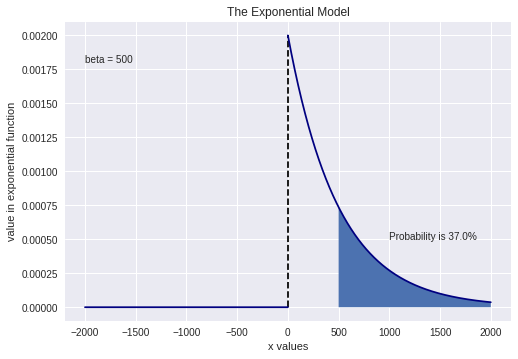

In [11]:
plt.plot(x_values[0:median], y_values[0:median], color='navy', label='Normal function')
plt.plot(x_values[median:], y_values[median:], color='navy')
plt.vlines(x_values[median], 0, y_values[median], ls='dashed', color='black')
plt.title('The Exponential Model')
plt.xlabel('x values')
plt.ylabel('value in exponential function')
plt.text(-2000, 0.00180, f'beta = {beta}')
plt.text(1000, 0.00050, f'Probability is {probability}%')
plt.fill_between(x_fill, y_fill)

## Referências:

BUSSAB, Wilton de O.; MORETTIN, Pedro A. Estatística Básica. 5ª edição. São Paulo: Editora Saraiva, 2004.